<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [3]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

# Seleccionar las columnas de interés (según la introducción)
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']
df = df.loc[:, columns]

# Mostrar los primeros registros
df.head(10)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

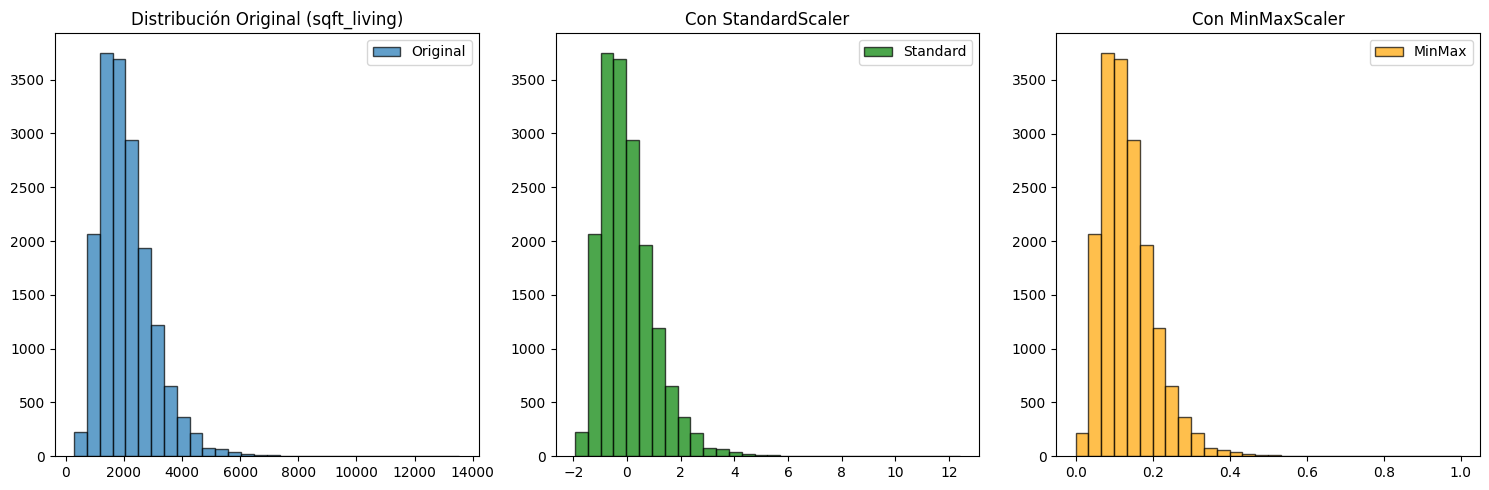

In [6]:
# 1. Dividir el conjunto de datos en características y etiquetas (Estilo original)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Probar técnica 1: StandardScaler (Media 0, Desviación 1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# 4. Probar técnica 2: MinMaxScaler (Rango entre 0 y 1)
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# 5. Graficar la distribución comparativa
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(X_train['sqft_living'], bins=30, alpha=0.7, edgecolor='black', label='Original')
plt.title('Distribución Original (sqft_living)')
plt.legend()

# StandardScaler
plt.subplot(1, 3, 2)
# Nota: Al escalar se convierte en array numpy, sqft_living es la columna índice 2
plt.hist(X_train_std[:, 2], bins=30, alpha=0.7, edgecolor='black', color='green', label='Standard')
plt.title('Con StandardScaler')
plt.legend()

# MinMaxScaler
plt.subplot(1, 3, 3)
plt.hist(X_train_mm[:, 2], bins=30, alpha=0.7, edgecolor='black', color='orange', label='MinMax')
plt.title('Con MinMaxScaler')
plt.legend()

plt.tight_layout()
plt.show()

---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [7]:
# Dividir el conjunto de datos en características y etiquetas
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

# Reviso las dimensiones de las características y etiquetas
print('Dimensiones de características y etiquetas:')
print('X:', X.shape)
print('y:', y.shape)

Dimensiones de características y etiquetas:
X: (21613, 5)
y: (21613, 1)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (17290, 5)
y_train: (17290, 1)
X_test: (4323, 5)
y_test: (4323, 1)




```
# E`sto tiene formato de código`
```

Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

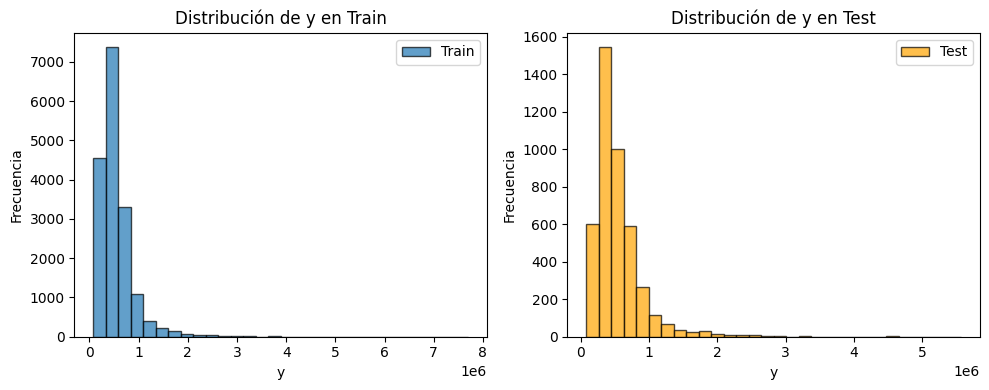

In [9]:
plt.figure(figsize=(10, 4))

# Histograma para y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, edgecolor='black', label='Train')
plt.title('Distribución de y en Train')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, edgecolor='black', label='Test', color='orange')
plt.title('Distribución de y en Test')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

In [10]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes e intercepto (similar a la 'Ecuación de la recta' del código referencia)
print('Modelo entrenado exitosamente.')
print('Intercepto (b):', modelo.intercept_)
print('Coeficientes (m):', modelo.coef_)

Modelo entrenado exitosamente.
Intercepto (b): [80382.98549305]
Coeficientes (m): [[-5.60573250e+04  5.92604497e+03  3.09525201e+02 -3.62496335e-01
  -1.26782813e+03]]


---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [11]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})

# Mostrar los datos
display(df_predicciones)

,Actual,Predicción
0,262000.0,3.275199e+05
1,593777.0,3.849087e+05
2,405000.0,4.377430e+05
3,366000.0,4.866932e+05
4,361000.0,3.727038e+05
...,...,...
4318,645000.0,5.105418e+05
4319,299950.0,4.737597e+05
4320,1484900.0,1.219927e+06
4321,263000.0,4.136184e+05


Calcula el error cuadrático medio.

In [12]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 65009322812.335846


Escribe el error cuadrático medio para cada tipo de escalado:

- Escalado MaxAbsScaler:
- Escalado MinMaxScaler:
- Escalado RobustScaler:
- Escalado StandardScaler:
- Escalado Normalizer:
- Escalado QuantileTransformer:
- Escalado PowerTransformer:

In [14]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler, Normalizer, QuantileTransformer, PowerTransformer

# Lista de escaladores a probar
scalers = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=0),
    'PowerTransformer': PowerTransformer()
}

print("Resultados del Error Cuadrático Medio (MSE) por tipo de escalado:")
print("-" * 60)

for name, scaler in scalers.items():
    # 1. Escalar los datos (Fit en train, transform en train y test)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Entrenar el modelo con datos escalados
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # 3. Predecir
    y_pred_scaled = model.predict(X_test_scaled)

    # 4. Calcular MSE
    mse = mean_squared_error(y_test, y_pred_scaled)

    # Mostrar resultado con el formato solicitado
    print(f"Escalado {name}: {mse}")

Resultados del Error Cuadrático Medio (MSE) por tipo de escalado:
------------------------------------------------------------
Escalado MaxAbsScaler: 65009322812.33681
Escalado MinMaxScaler: 65009322812.3368
Escalado RobustScaler: 65009322812.33679
Escalado StandardScaler: 65009322812.3368
Escalado Normalizer: 107785576857.27591
Escalado QuantileTransformer: 82698008730.07793
Escalado PowerTransformer: 82231486222.29245


Escribe un párrafo sobre qué hace cada escalado no visto en clase:


*  Escalado QuantileTransformer: Este
escalador transforma las características para que sigan una distribución uniforme o normal suavizando los patrones inusuales, lo cual es muy útil para manejar datos con formas raras aunque a veces distorsiona las distancias lineales entre los puntos.


*  Escalado PowerTransformer: Aplica una transformación matemática de potencia para obligar a los datos a parecerse lo más posible a una campana de Gauss, ayudando así a corregir la asimetría y estabilizar la varianza para que el modelo funcione mejor.



*  Escalado RobustScaler: Este método escala los datos utilizando la mediana y el rango intercuartílico ignorando los valores extremos, por lo que es la mejor opción cuando tienes muchos outliers y no quieres que estos afecten o arruinen el escalado del resto de tus datos.